In [167]:
!pip install kaggle

In [168]:
! mkdir ~/.kaggle

In [170]:
! cp kaggle.json ~/.kaggle/

In [171]:
! chmod 600 ~/.kaggle/kaggle.json

In [172]:
!kaggle datasets download -d yasserh/wine-quality-dataset

  0% 0.00/21.5k [00:00<?, ?B/s]
100% 21.5k/21.5k [00:00<00:00, 29.6MB/s]


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [40]:
data = pd.read_csv("WineQT.csv")

In [41]:
print(data.describe())


       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000         

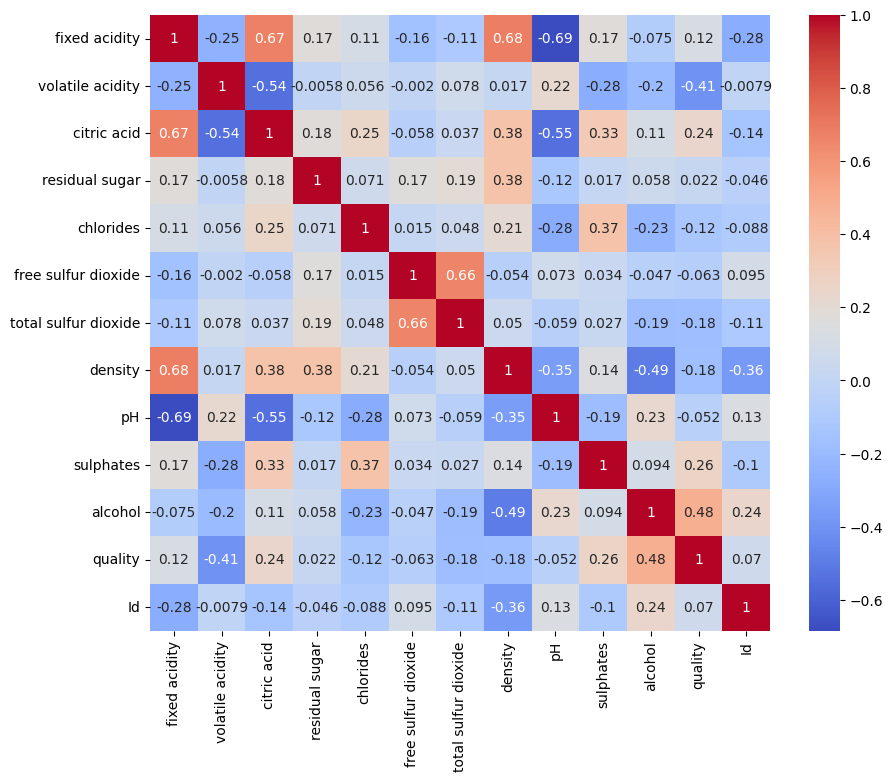

In [42]:
# Correlation heatmap
correlation = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

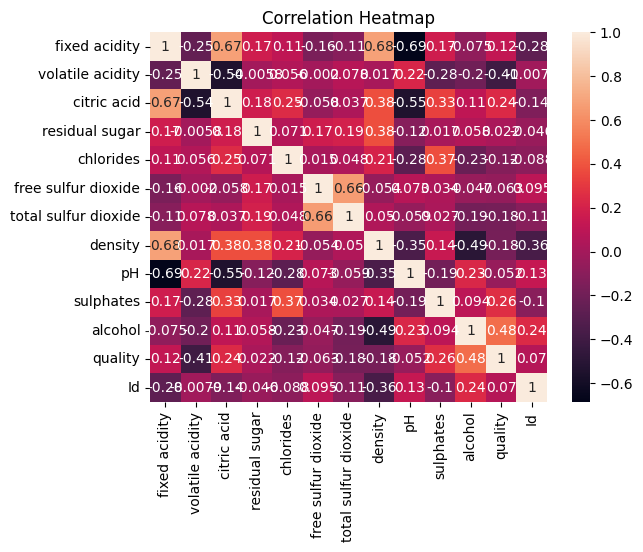

In [90]:
# Correlations
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Heatmap")
plt.show()

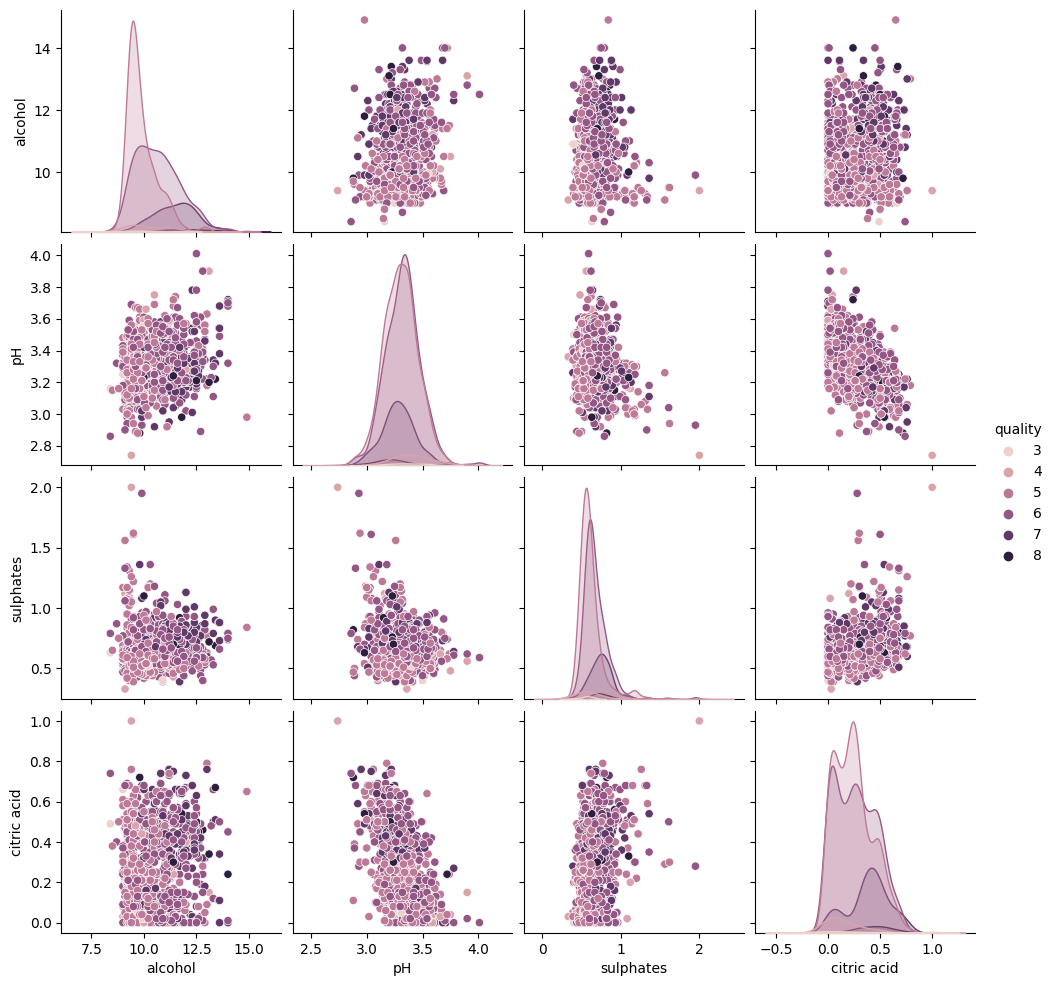

In [43]:
# Pairplot for visualizing relationships
sns.pairplot(data, vars=["alcohol", "pH", "sulphates", "citric acid"], hue="quality")
plt.show()

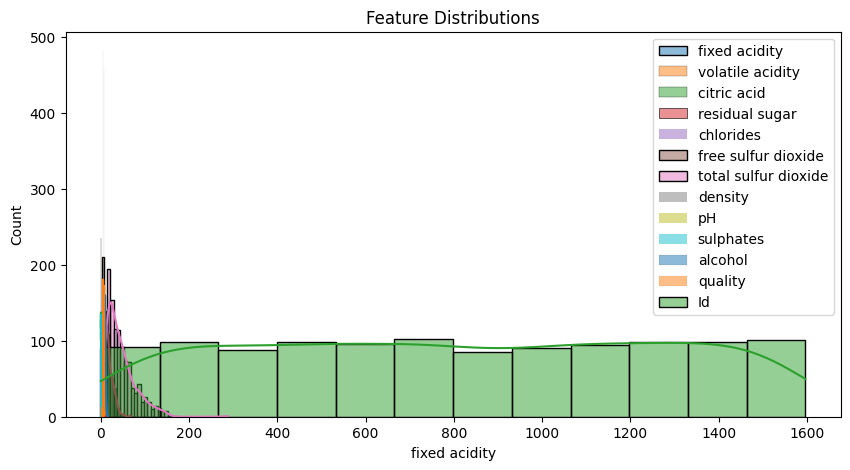

In [93]:
# Distributions and Histograms
plt.figure(figsize=(10,5 ))
for column in data.columns:
    sns.histplot(data=data, x=column, kde=True, label=column)
plt.legend()
plt.title("Feature Distributions")
plt.show()

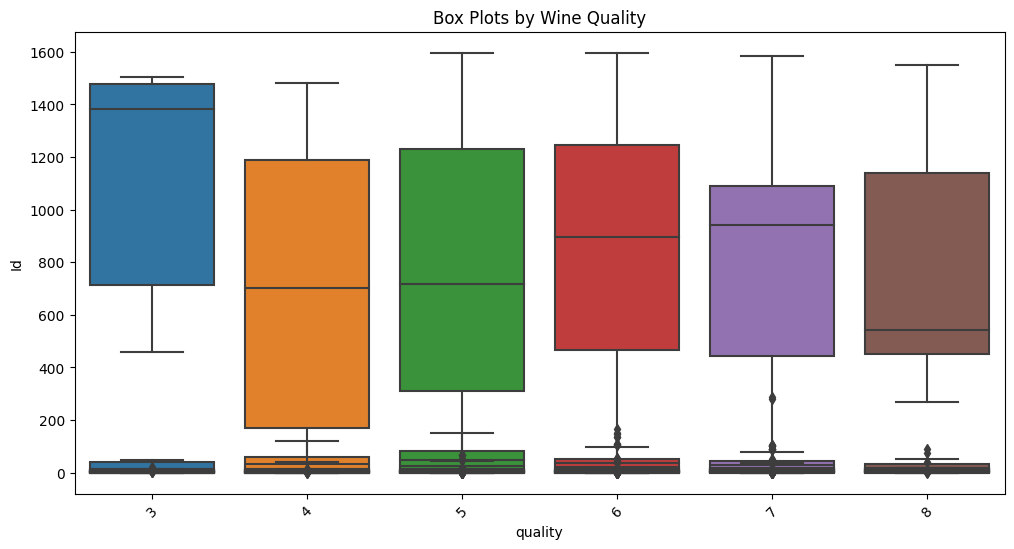

In [94]:
# Box Plots
plt.figure(figsize=(12, 6))
for column in data.columns:
    sns.boxplot(data=data, x="quality", y=column)
plt.title("Box Plots by Wine Quality")
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: 
The markers list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: 
The markers list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: 
The markers list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: 
The markers list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: 
The markers list has fewer values (3) th

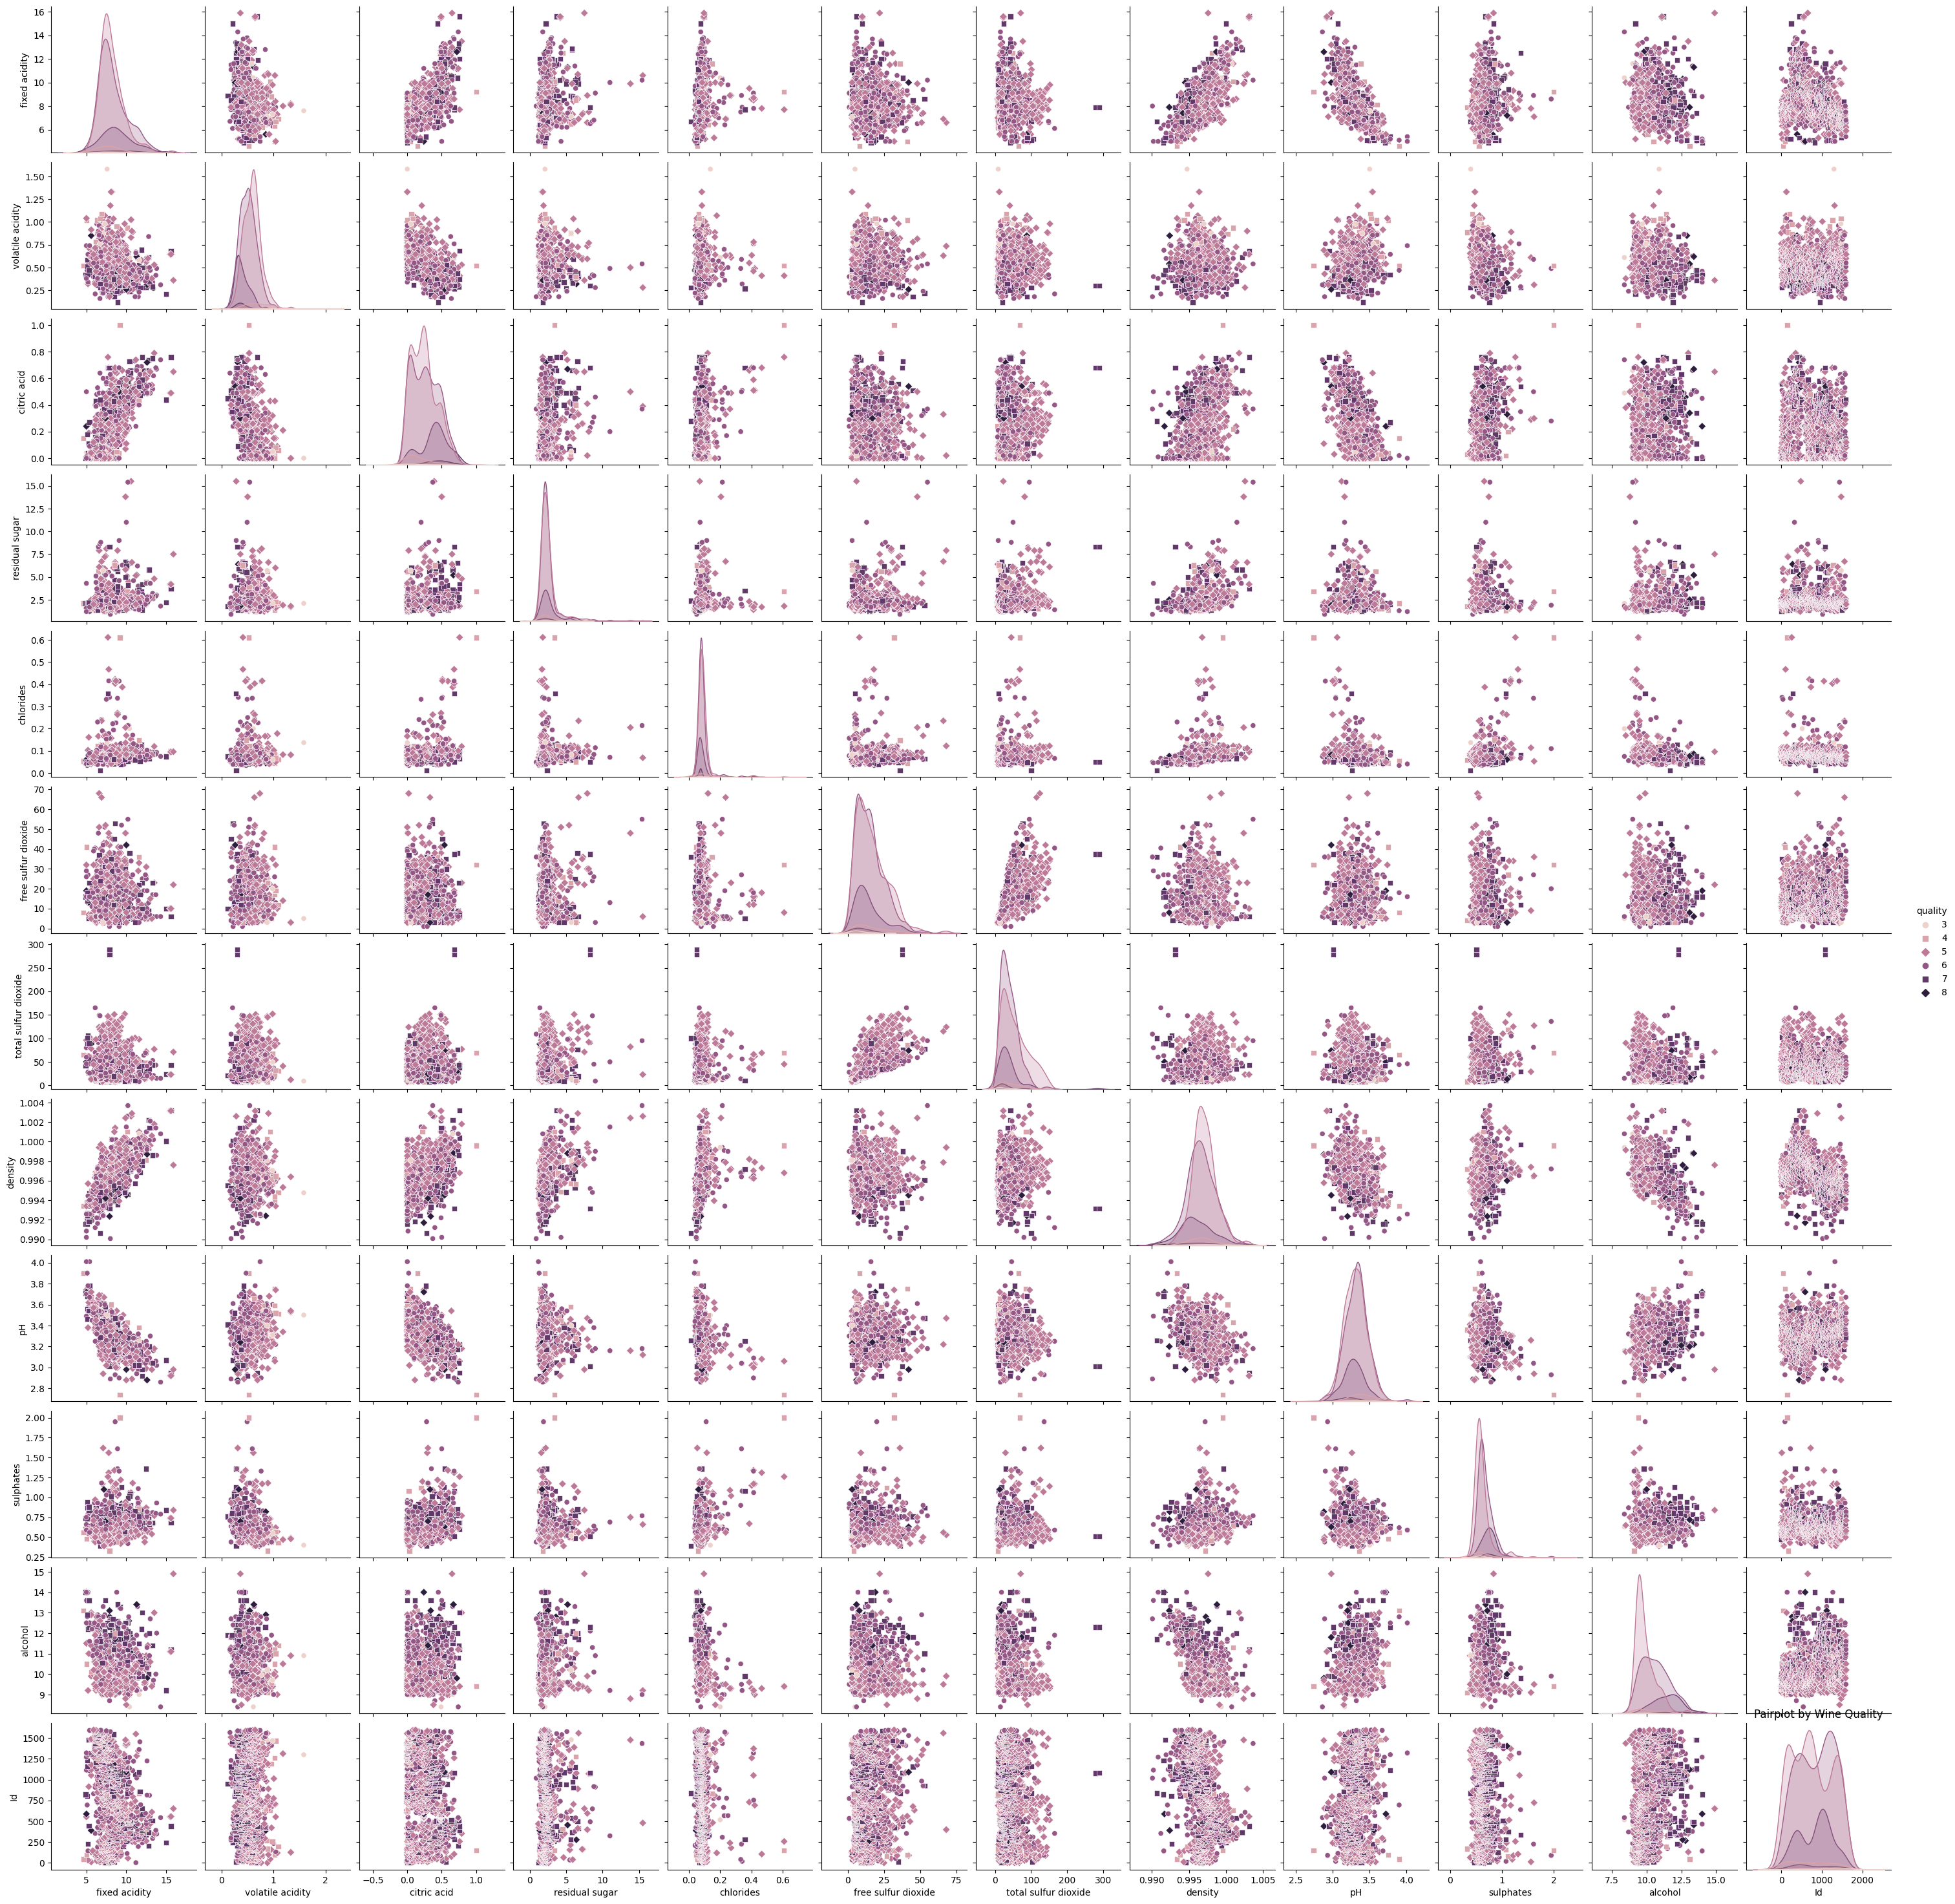

In [95]:
# Pairplots and Scatter Plots
sns.pairplot(data, hue="quality", markers=["o", "s", "D"])
plt.title("Pairplot by Wine Quality")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


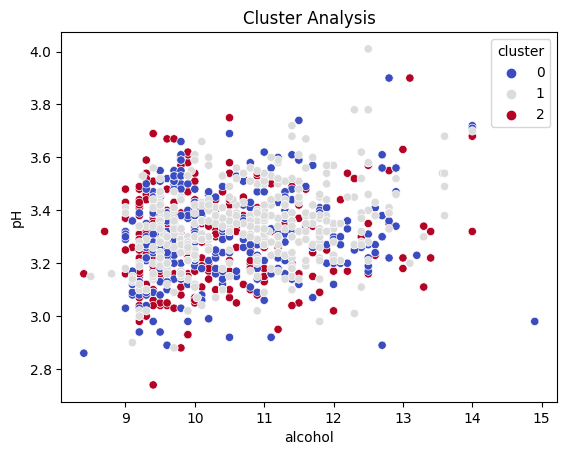

In [96]:
# Cluster Analysis (e.g., K-Means clustering)
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(X)
sns.scatterplot(data=data, x='alcohol', y='pH', hue='cluster', palette='coolwarm')
plt.title("Cluster Analysis")
plt.show()


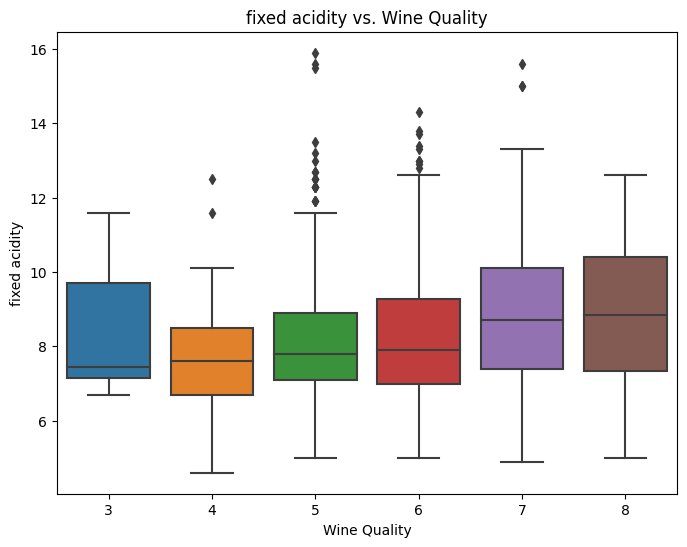

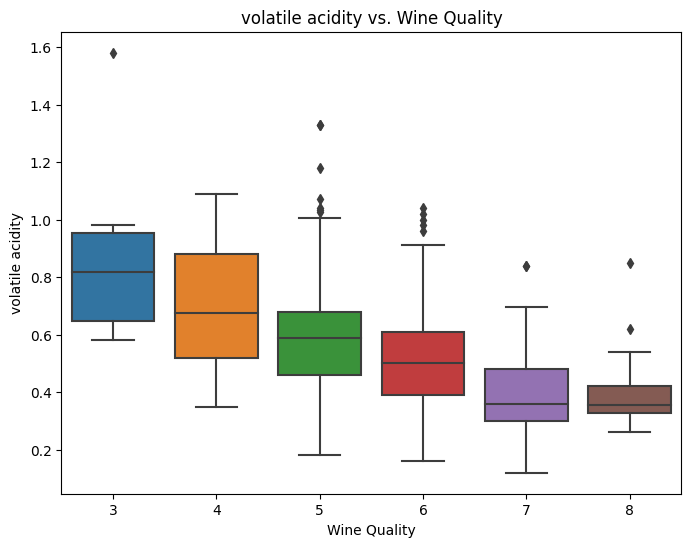

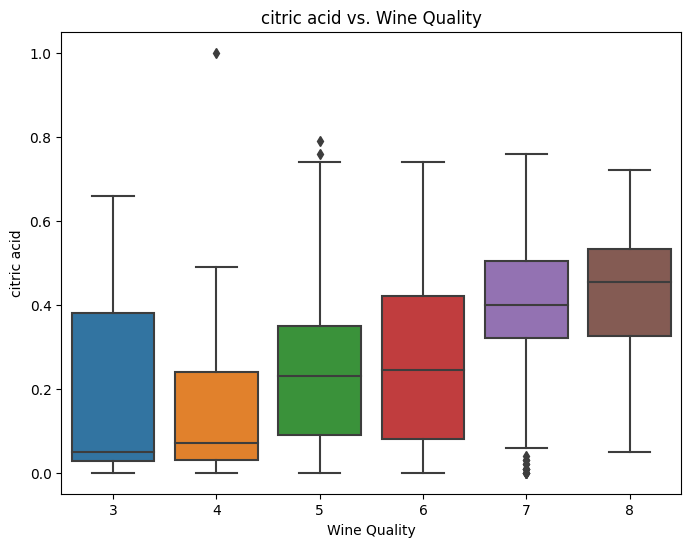

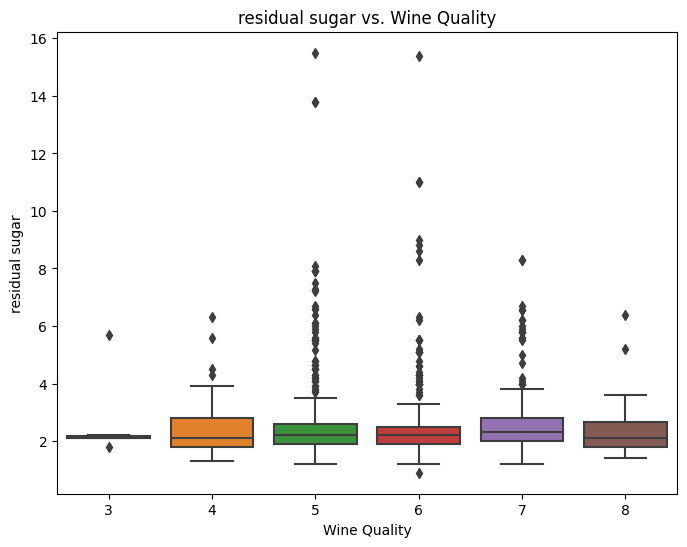

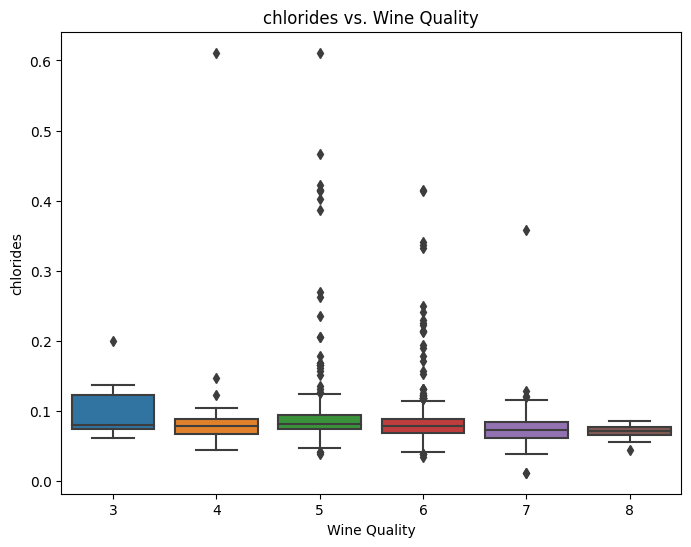

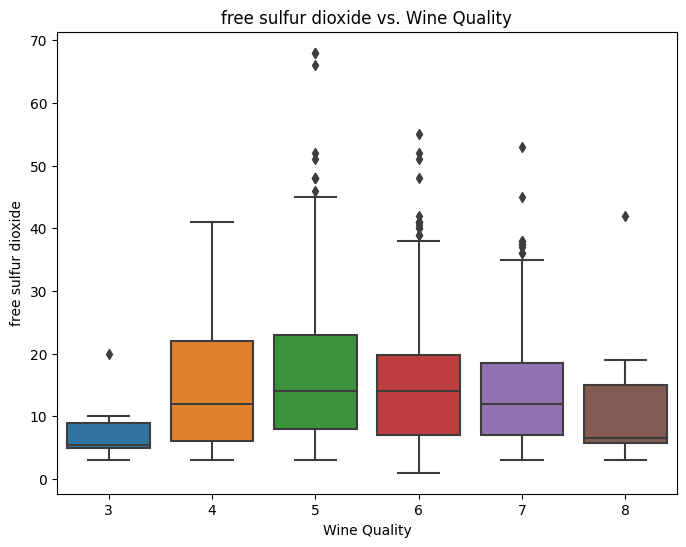

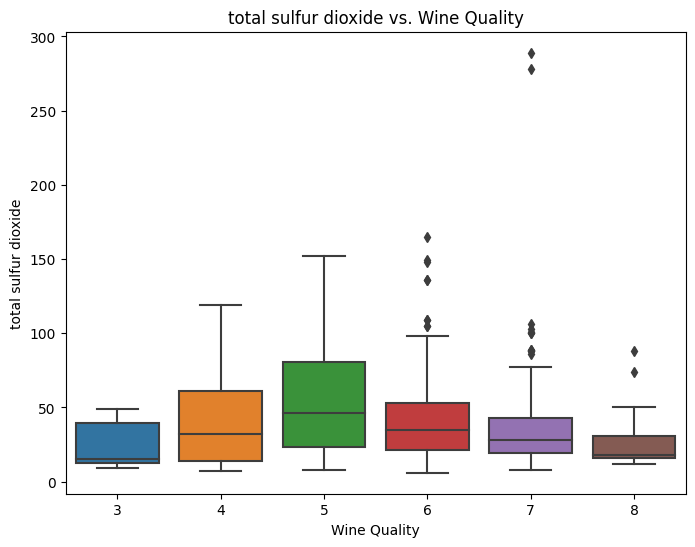

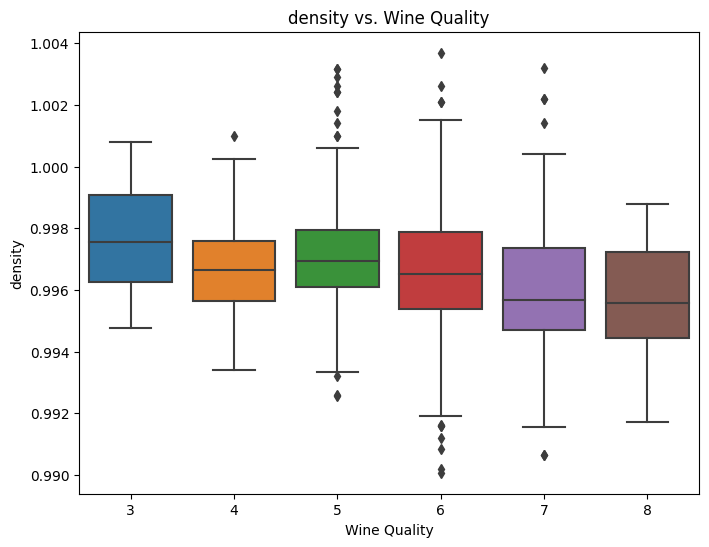

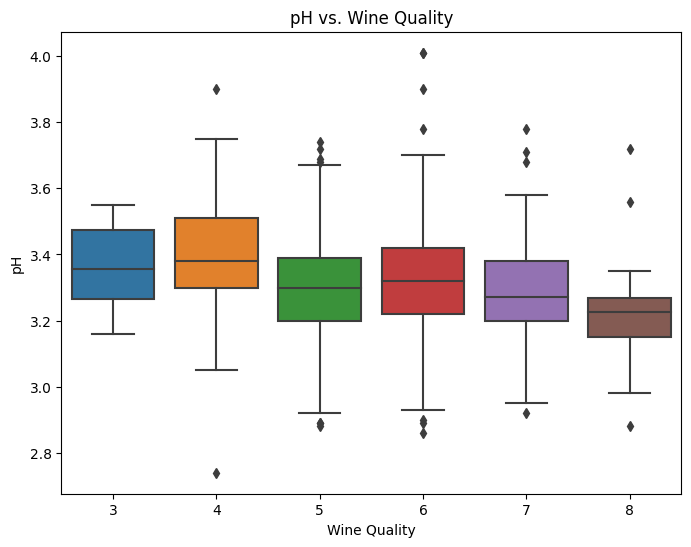

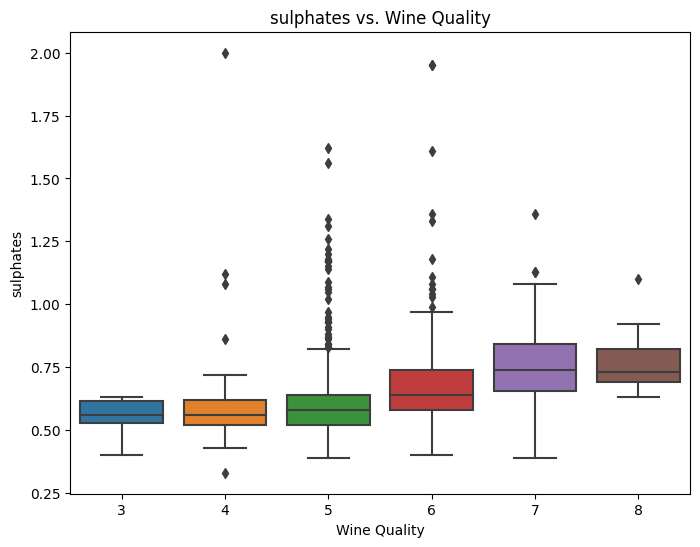

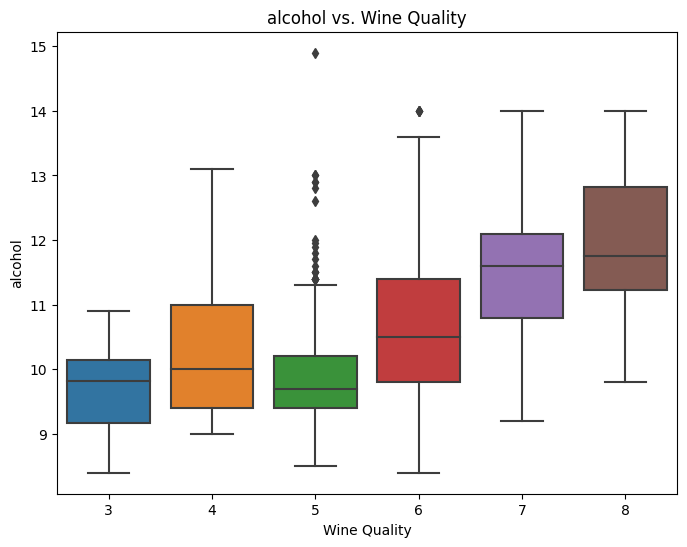

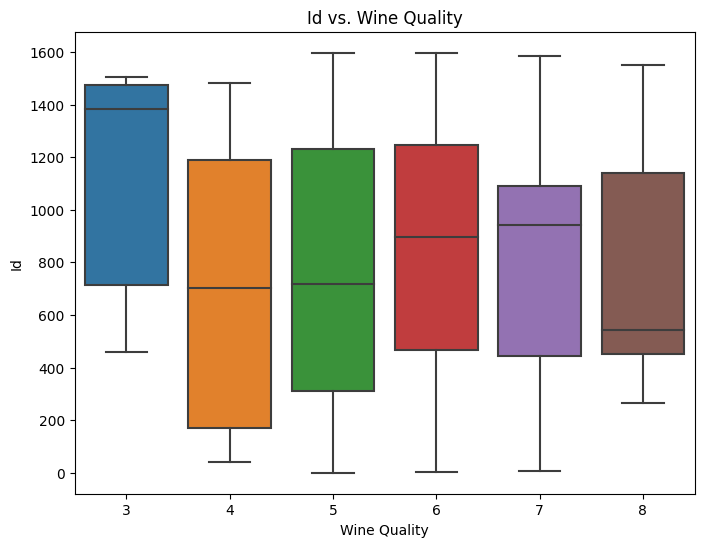

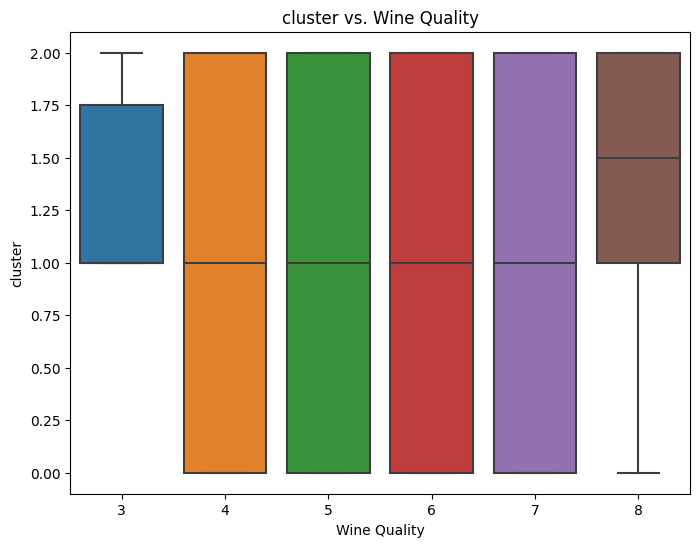

Correlations with Wine Quality:
                      Correlation
alcohol                  0.484866
sulphates                0.257710
citric acid              0.240821
fixed acidity            0.121970
Id                       0.069708
residual sugar           0.022002
cluster                  0.004510
pH                      -0.052453
free sulfur dioxide     -0.063260
chlorides               -0.124085
density                 -0.175208
total sulfur dioxide    -0.183339
volatile acidity        -0.407394


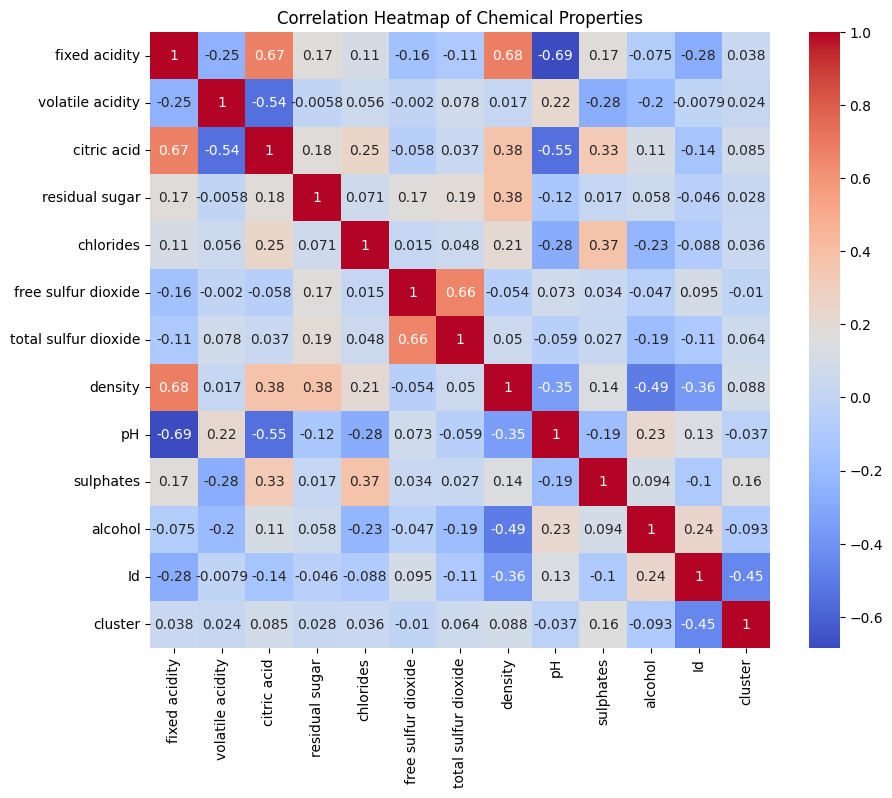

In [97]:
# Separate chemical properties from wine quality
chemical_properties = data.drop("quality", axis=1)
wine_quality = data["quality"]

# Visualize chemical properties by wine quality
for column in chemical_properties.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=wine_quality, y=chemical_properties[column])
    plt.title(f"{column} vs. Wine Quality")
    plt.xlabel("Wine Quality")
    plt.ylabel(column)
    plt.show()

# Correlations with wine quality
correlations = chemical_properties.corrwith(wine_quality)
correlation_df = pd.DataFrame({'Correlation': correlations})
correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)
print("Correlations with Wine Quality:")
print(correlation_df)

# Heatmap of chemical property correlations
correlation_matrix = chemical_properties.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Chemical Properties")
plt.show()

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into features (X) and target (y)
X = data.drop("quality", axis=1)
y = data["quality"]

In [45]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)


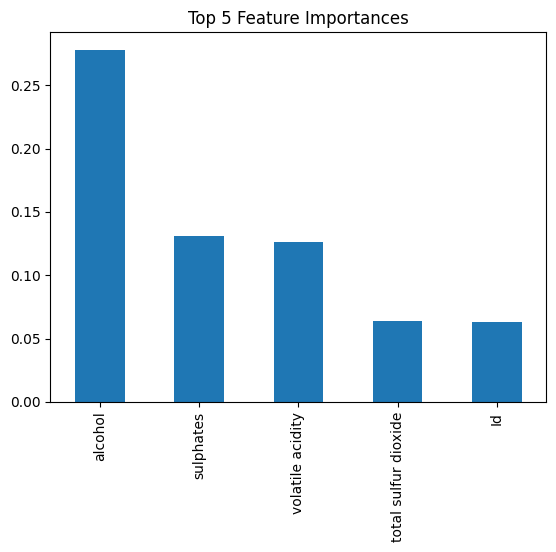

In [89]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
feature_importance.nlargest(5).plot(kind='bar')
plt.title("Top 5 Feature Importances")
plt.show()


In [48]:
X = data.drop("quality", axis=1)
y = data["quality"]

In [50]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [34]:
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_clf = grid_search.best_estimator_

# Train the best model on the entire training set
best_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Model Accuracy: {accuracy * 100:.2f}%")
print("Best Hyperparameters:", grid_search.best_params_)

Best Model Accuracy: 69.00%
Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [51]:
# Create and train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [52]:
# Make predictions on the test set
y_pred = clf.predict(X_test)


In [53]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 69.00%


In [54]:
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)


Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.73      0.75      0.74        96
           6       0.64      0.71      0.67        99
           7       0.76      0.62      0.68        26
           8       0.00      0.00      0.00         2

    accuracy                           0.69       229
   macro avg       0.43      0.41      0.42       229
weighted avg       0.67      0.69      0.68       229



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [99]:
new_wine_sample = np.array([8.2, 0.28, 0.40, 1.8, 0.029, 32.0, 70.0, 0.9968, 3.20, 0.68, 9.6, 5.0]).reshape(1, -1)
scaled_sample = scaler.transform(new_wine_sample)
predicted_quality = model.predict(scaled_sample)

print(f"Predicted Quality: {predicted_quality[0]}")


1/1 [==============================] - 0s 31ms/step
Predicted Quality: [5.6319556]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [55]:
confusion_mtx = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mtx)


Confusion Matrix:
 [[ 0  3  3  0  0]
 [ 0 72 24  0  0]
 [ 0 24 70  5  0]
 [ 0  0 10 16  0]
 [ 0  0  2  0  0]]


In [49]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', C=1),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

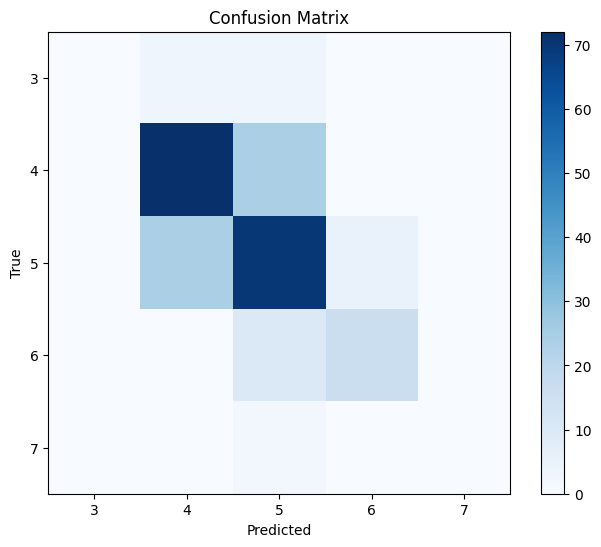

In [58]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(5), np.arange(3, 8))
plt.yticks(np.arange(5), np.arange(3, 8))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [59]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy * 100:.2f}%")

Random Forest Accuracy: 69.00%
SVM Accuracy: 61.14%
KNN Accuracy: 55.90%
Gradient Boosting Accuracy: 66.81%


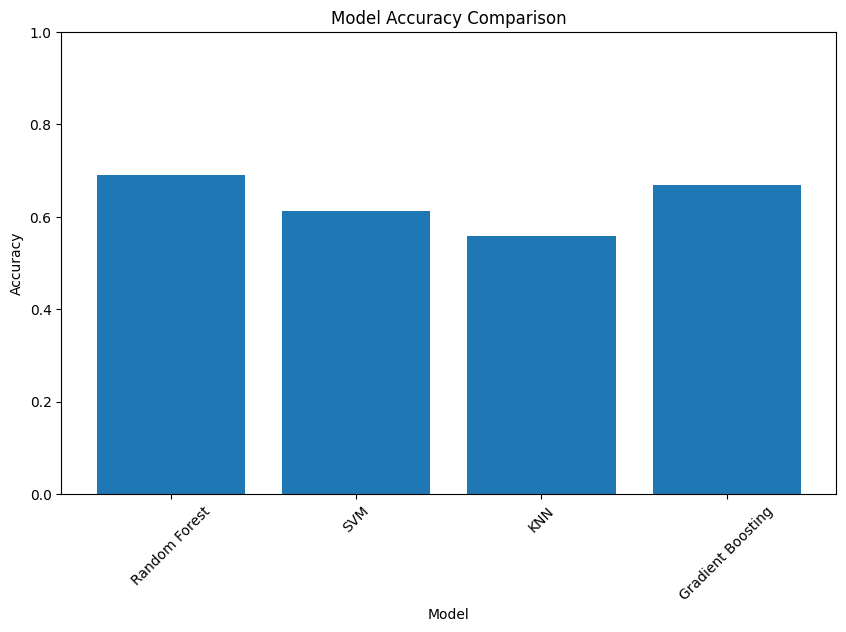

In [60]:
accuracies = []

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Create a bar graph to compare model accuracies
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), accuracies)
plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim([0, 1.0])  # Set the y-axis range
plt.xticks(rotation=45)
plt.show()

In [108]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error, r2_score
# Create a neural network model
model = keras.Sequential()
model.add(layers.Input(shape=(X_train.shape[1],)))  # Input layer
model.add(layers.Dense(128, activation='relu'))      # Hidden layer with 128 units and ReLU activation
model.add(layers.Dense(64, activation='relu'))       # Hidden layer with 64 units and ReLU activation
model.add(layers.Dense(1))

In [104]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [105]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [106]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2)


Epoch 1/100
23/23 - 3s - loss: 3.9114 - val_loss: 1.6014 - 3s/epoch - 118ms/step
Epoch 2/100
23/23 - 0s - loss: 1.2107 - val_loss: 1.1156 - 121ms/epoch - 5ms/step
Epoch 3/100
23/23 - 0s - loss: 0.8546 - val_loss: 0.9414 - 117ms/epoch - 5ms/step
Epoch 4/100
23/23 - 0s - loss: 0.7363 - val_loss: 0.8780 - 142ms/epoch - 6ms/step
Epoch 5/100
23/23 - 0s - loss: 0.6761 - val_loss: 0.8256 - 157ms/epoch - 7ms/step
Epoch 6/100
23/23 - 0s - loss: 0.6297 - val_loss: 0.7917 - 184ms/epoch - 8ms/step
Epoch 7/100
23/23 - 0s - loss: 0.5993 - val_loss: 0.7537 - 233ms/epoch - 10ms/step
Epoch 8/100
23/23 - 0s - loss: 0.5656 - val_loss: 0.7249 - 235ms/epoch - 10ms/step
Epoch 9/100
23/23 - 0s - loss: 0.5439 - val_loss: 0.7075 - 215ms/epoch - 9ms/step
Epoch 10/100
23/23 - 0s - loss: 0.5213 - val_loss: 0.6801 - 206ms/epoch - 9ms/step
Epoch 11/100
23/23 - 0s - loss: 0.5036 - val_loss: 0.6631 - 120ms/epoch - 5ms/step
Epoch 12/100
23/23 - 0s - loss: 0.4850 - val_loss: 0.6457 - 118ms/epoch - 5ms/step
Epoch 13/100

In [109]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

8/8 [==============================] - 0s 2ms/step


In [110]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2): {r2}")


Mean Squared Error: 30.901609050674235
R-squared (R2): -54.531193209046904


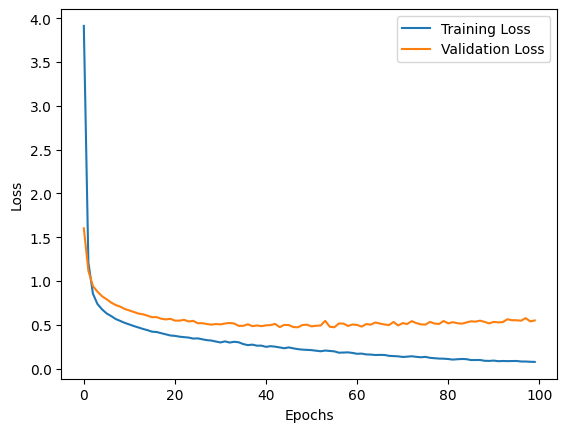

In [111]:
# Plot training history (loss over epochs)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [64]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
29/29 [==============================] - 2s 5ms/step - loss: 28.2957
Epoch 2/50
29/29 [==============================] - 0s 4ms/step - loss: 13.6392
Epoch 3/50
29/29 [==============================] - 0s 3ms/step - loss: 4.5937
Epoch 4/50
29/29 [==============================] - 0s 3ms/step - loss: 2.6719
Epoch 5/50
29/29 [==============================] - 0s 5ms/step - loss: 2.0371
Epoch 6/50
29/29 [==============================] - 0s 7ms/step - loss: 1.7304
Epoch 7/50
29/29 [==============================] - 0s 7ms/step - loss: 1.5472
Epoch 8/50
29/29 [==============================] - 0s 6ms/step - loss: 1.4192
Epoch 9/50
29/29 [==============================] - 0s 7ms/step - loss: 1.3216
Epoch 10/50
29/29 [==============================] - 0s 5ms/step - loss: 1.2381
Epoch 11/50
29/29 [==============================] - 0s 8ms/step - loss: 1.1634
Epoch 12/50
29/29 [==============================] - 0s 7ms/step - loss: 1.0962
Epoch 13/50
29/29 [============================

In [65]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Round the predictions to get discrete wine quality values
y_pred = np.round(y_pred)

8/8 [==============================] - 0s 3ms/step


In [66]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Neural Network Accuracy: {accuracy * 100:.2f}%")

Neural Network Accuracy: 60.26%


In [86]:
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Create individual regression models
model1 = DecisionTreeRegressor(random_state=42)
model2 = RandomForestRegressor(n_estimators=100, random_state=42)
model3 = KNeighborsRegressor(n_neighbors=5)

# Create a voting regressor ensemble
ensemble = VotingRegressor(estimators=[('dt', model1), ('rf', model2), ('knn', model3)], weights=[1, 1, 1])

# Train the ensemble model
ensemble.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ensemble.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Voting Regressor MSE: {mse:.2f}")


Voting Regressor MSE: 9.15


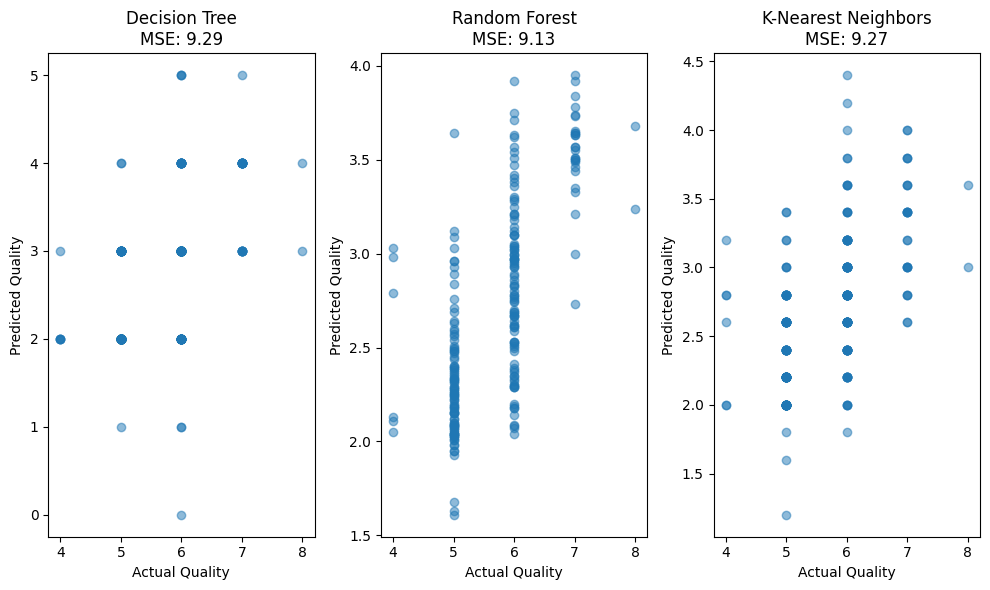

In [112]:

# Train the individual models
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

# Make predictions using the individual models
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)

# Calculate Mean Squared Error (MSE) for each model
mse1 = mean_squared_error(y_test, y_pred1)
mse2 = mean_squared_error(y_test, y_pred2)
mse3 = mean_squared_error(y_test, y_pred3)

# Plot the actual vs. predicted wine quality scores for each model
plt.figure(figsize=(10, 6))

plt.subplot(131)
plt.scatter(y_test, y_pred1, alpha=0.5)
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title(f"Decision Tree\nMSE: {mse1:.2f}")

plt.subplot(132)
plt.scatter(y_test, y_pred2, alpha=0.5)
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title(f"Random Forest\nMSE: {mse2:.2f}")

plt.subplot(133)
plt.scatter(y_test, y_pred3, alpha=0.5)
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title(f"K-Nearest Neighbors\nMSE: {mse3:.2f}")

plt.tight_layout()
plt.show()

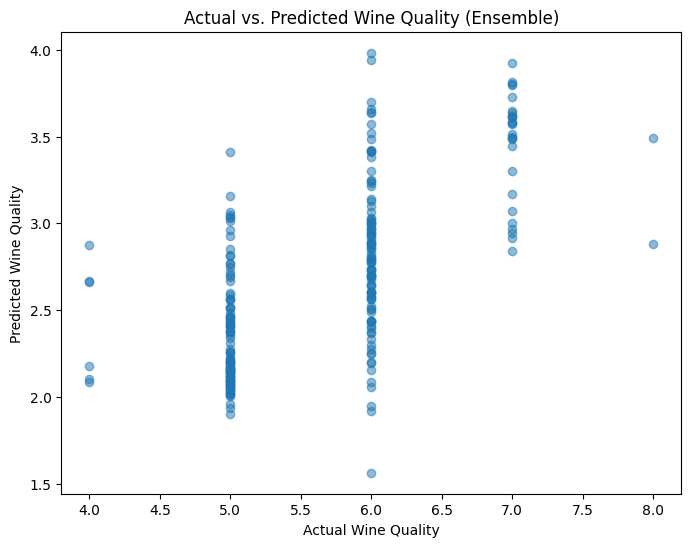

In [88]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Wine Quality")
plt.ylabel("Predicted Wine Quality")
plt.title("Actual vs. Predicted Wine Quality (Ensemble)")
plt.show()


In [134]:
from sklearn.linear_model import Ridge, Lasso

In [155]:
# Load your dataset
data = pd.read_csv("WineQT.csv")  #

In [156]:
# Separate the features (X) and the target (y)
X = data.drop("quality", axis=1)
y = data["quality"]

In [157]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [158]:
# Initialize Ridge and Lasso Regression models
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha parameter

In [159]:
# Train the Ridge and Lasso models
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

Lasso()

In [160]:
# Make predictions using Ridge and Lasso models
ridge_pred = ridge_model.predict(X_test)
lasso_pred = lasso_model.predict(X_test)


In [161]:
# Evaluate the models
ridge_mse = mean_squared_error(y_test, ridge_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)

ridge_r2 = r2_score(y_test, ridge_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

In [162]:
print(f"Ridge MSE: {ridge_mse:.2f}")
print(f"Ridge R-squared: {ridge_r2:.2f}")
print(f"Lasso MSE: {lasso_mse:.2f}")
print(f"Lasso R-squared: {lasso_r2:.2f}")

Ridge MSE: 0.38
Ridge R-squared: 0.31
Lasso MSE: 0.56
Lasso R-squared: -0.00


Text(0, 0.5, 'Predicted Quality')

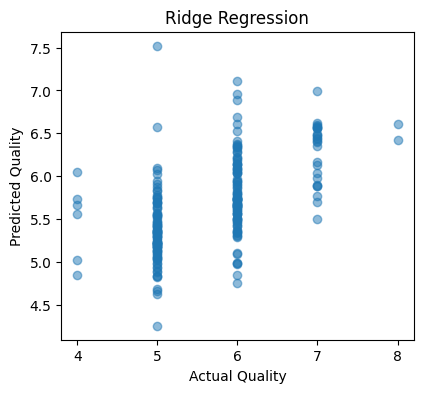

In [163]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(y_test, ridge_pred, alpha=0.5)
plt.title("Ridge Regression")
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")


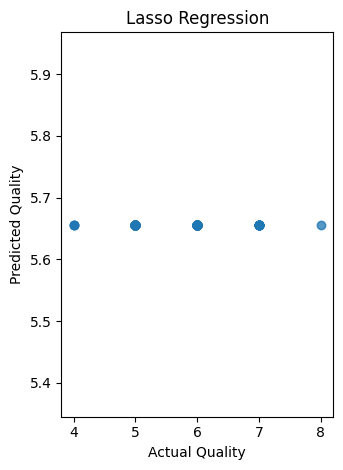

In [166]:
plt.subplot(1, 2, 2)
plt.scatter(y_test, lasso_pred, alpha=0.5)
plt.title("Lasso Regression")
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")

plt.tight_layout()
plt.show()